In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd

In [2]:
random.random()

0.5972093279068855

In [3]:
random.seed(123)
random.random()

0.052363598850944326

In [4]:
random.seed(random.random())
random.random()

0.5948007979055153

# Random vaues from real-valued Distributions

### Uniform

**With the Random module**

In [5]:
random.uniform(25, 50)
n = 10000

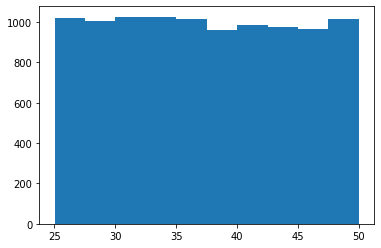

In [6]:
unif_numbers = [random.uniform(25, 50) for _ in range(n)]
plt.hist(unif_numbers);

**With NumPy**

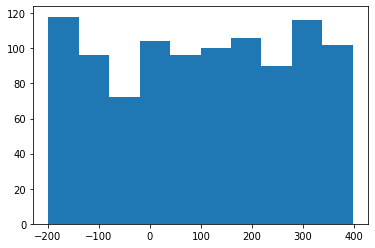

In [7]:
n = 1000
xs = np.random.uniform(-200, 400, size=n)
plt.hist(xs);

Ejercicio **Correlación y covarianza.** Vamos a comparar nuestras xs uniformes con ys aleatorias para diferentes tipos de correlaciones (lineal, cuadrática, cubica)

In [8]:
# Definimos una función para que cree aleatoriamente nuestras 'ys' con ruido (jitter).

def jitter(series, noise_factor=0.1):
    return series + np.random.randn(series.size) * noise_factor * (series.mean() + series.std())

In [9]:
# Definimos las 'ys' y sus coeficientes.

x_0 = 200
x_1 = 13
x_2 = 5
x_3 = 7

ys1 = jitter(x_0 + x_1 * xs)  # correlación lineal (Pearson r == 1)
ys2 = jitter(x_0 + x_1 * xs + x_2 * xs ** 2)  # correlación cuadrática
ys3 = jitter(x_0 + x_1 * xs + x_2 * xs ** 2 + x_3 * xs ** 3)  # correlación cúbica

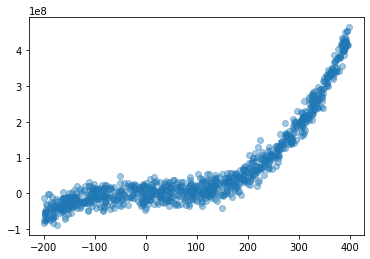

In [10]:
plt.scatter(xs, ys3, alpha=0.4)

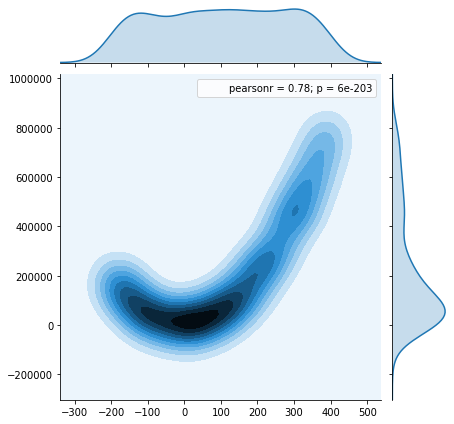

In [21]:
sns.jointplot(xs, ys2, kind='kde').annotate(stats.pearsonr)

In [12]:
# Matriz de covarianzas

all_vars = np.array([xs, ys1, ys2 , ys3])
np.cov(all_vars)

array([[3.10789878e+04, 4.02584901e+05, 3.11076659e+07, 1.85141743e+10],
       [4.02584901e+05, 5.37372328e+06, 4.04645249e+08, 2.40273202e+11],
       [3.11076659e+07, 4.04645249e+08, 5.15533177e+10, 2.62615343e+13],
       [1.85141743e+10, 2.40273202e+11, 2.62615343e+13, 1.54951942e+16]])

### Normal

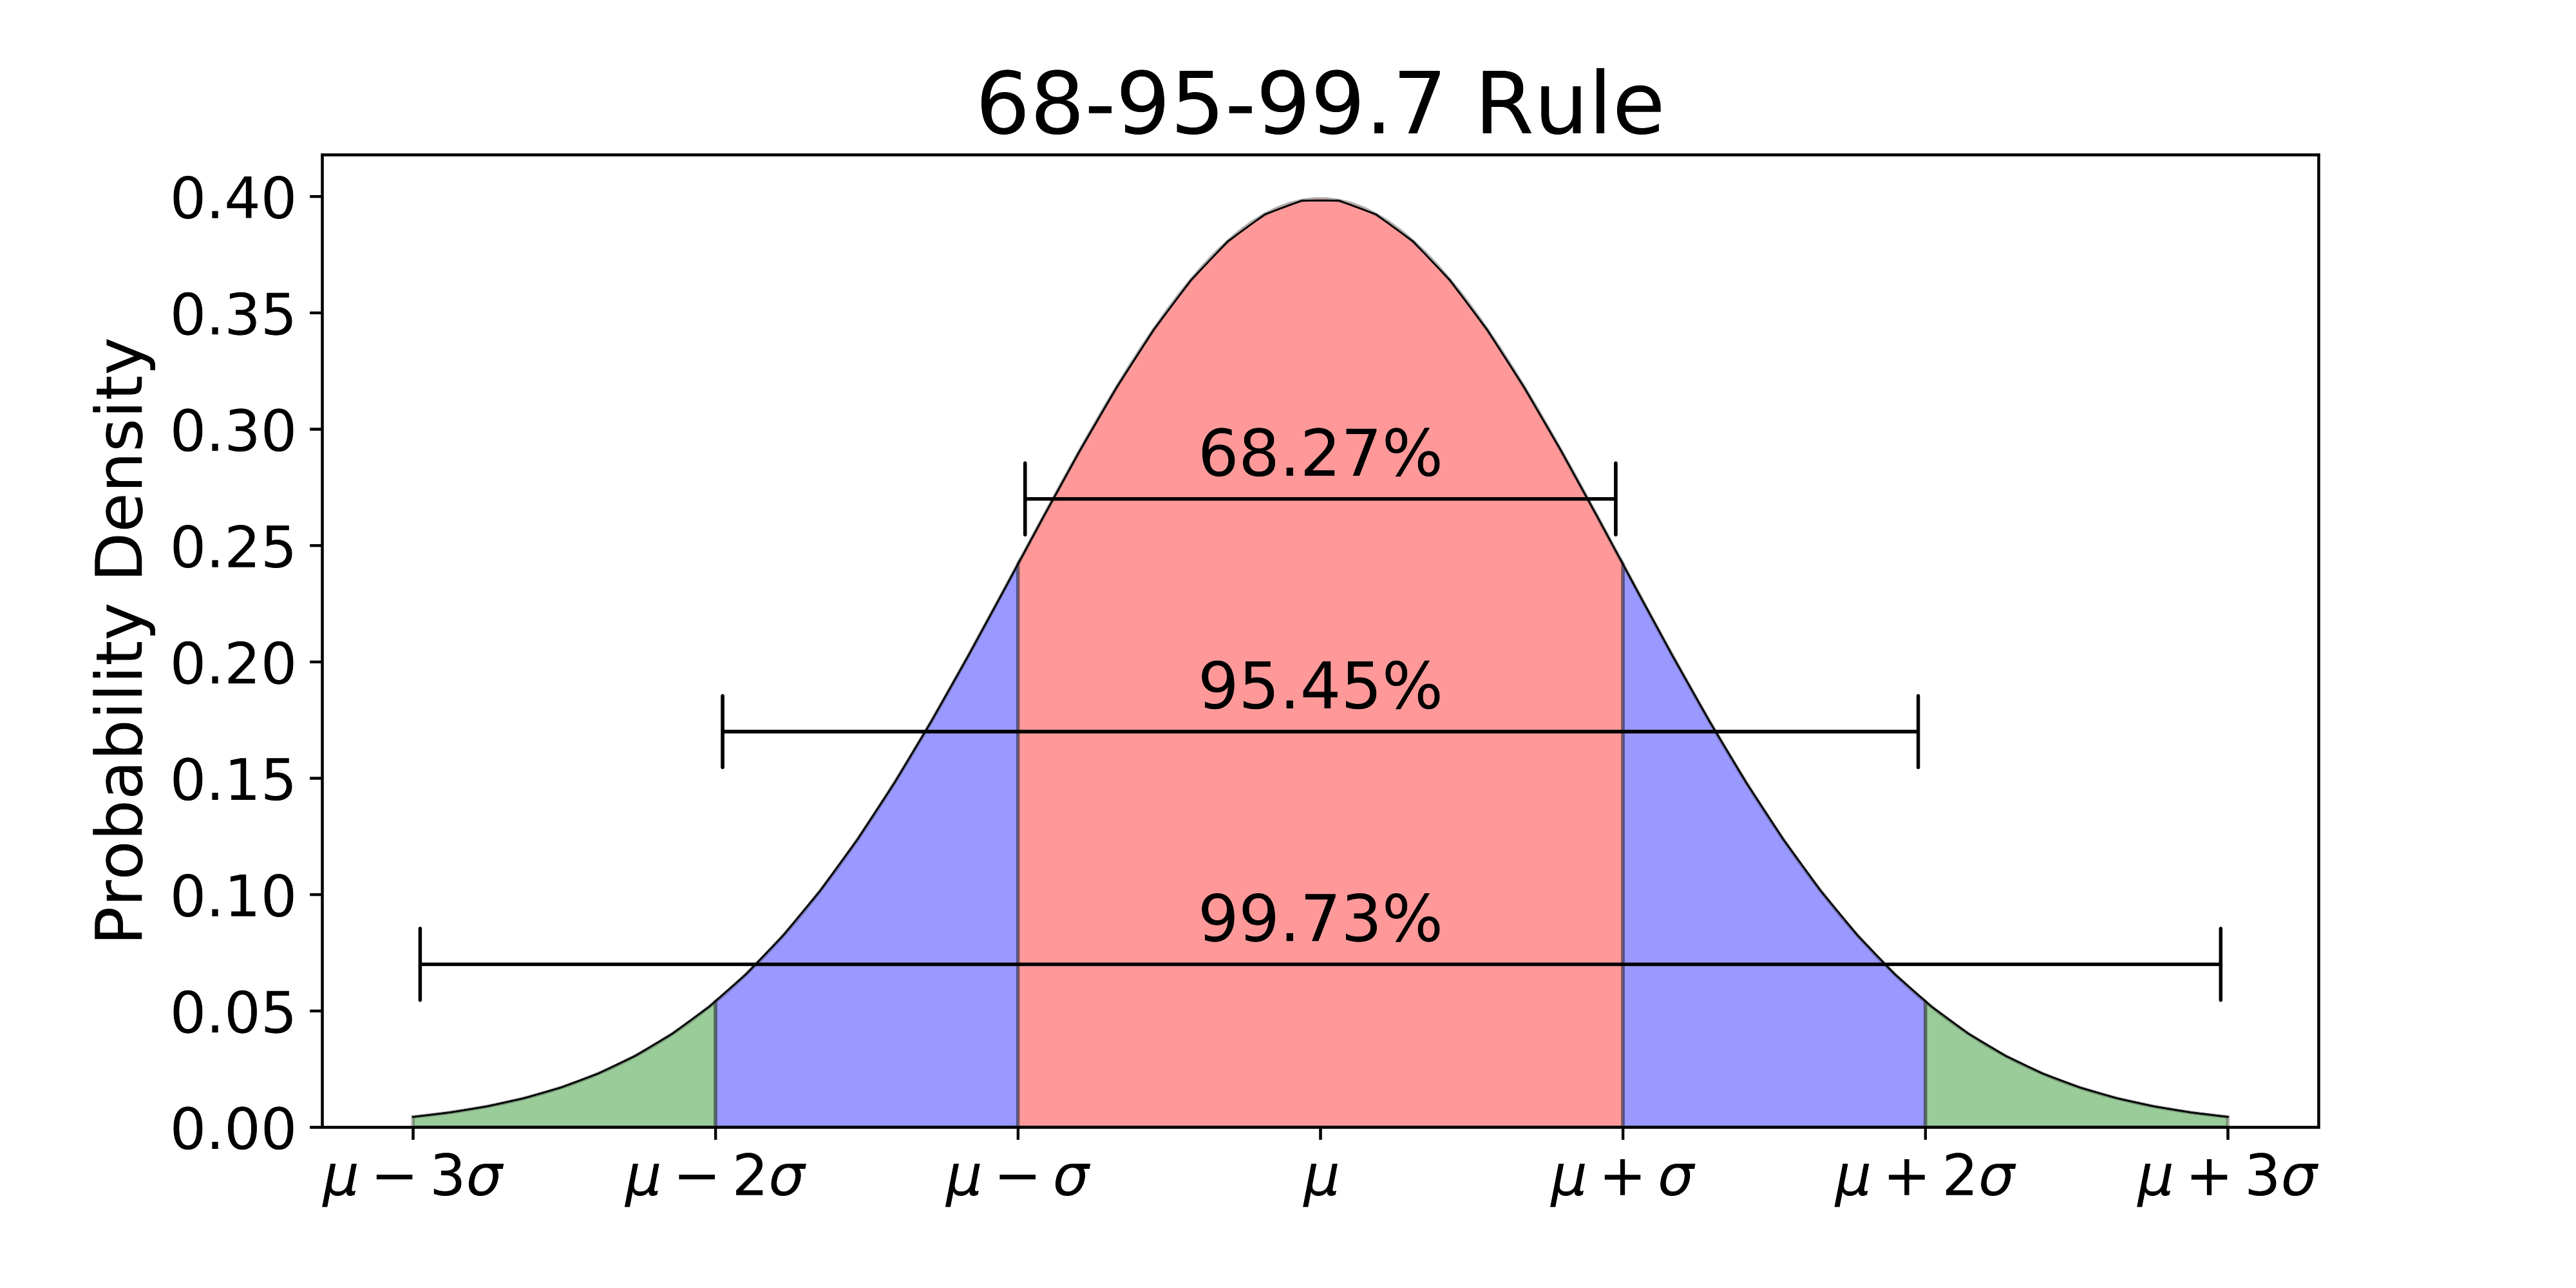

**With the Random module**

In [13]:
# Setting a mean and standard deviation

mu = 10
sigma = 2.5

random.normalvariate(mu, sigma)

12.298514230731845

In [14]:
normal_numbers = [random.normalvariate(mu, sigma) for _ in range(10000)]
# plt.hist(normal_numbers, bins=50);

**With NumPy**

**Ejercicio** Población: estudiantes de una universidad. Variable a estudiar: horas de sueño de cada uno de ellos.

In [15]:
mu = 7
sigma = 1.7
n = 10000

observations = np.random.normal(mu, sigma, size=n)
observations

array([6.54155794, 5.38439175, 8.40250706, ..., 6.43625179, 4.23099326,
       7.6373354 ])

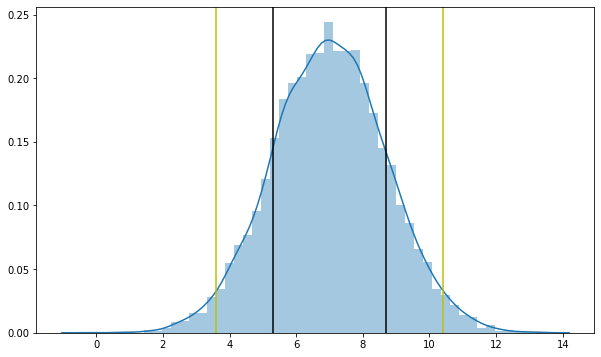

In [16]:
plt.figure(figsize=(10,6))

sns.distplot(observations)

plt.axvline(np.mean(observations) + sigma, color='k')
plt.axvline(np.mean(observations) - sigma, color='k')

plt.axvline(np.mean(observations) + sigma * 2, color='y')
plt.axvline(np.mean(observations) - sigma * 2, color='y')

In [17]:
pd.Series(observations).describe()

count    10000.000000
mean         7.002736
std          1.704670
min         -0.173676
25%          5.838291
50%          7.002640
75%          8.141868
max         13.330797
dtype: float64

In [18]:
sample_a = np.random.choice(observations, 100)
sample_b = np.random.choice(observations, 100)
sample_c = np.random.choice(observations, 100)

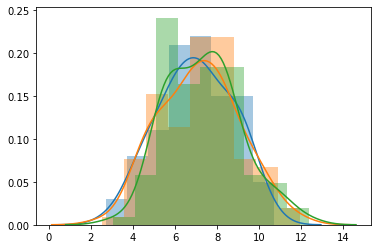

In [19]:
fig, ax = plt.subplots()

sns.distplot(sample_a, ax = ax)
sns.distplot(sample_b, ax = ax)
sns.distplot(sample_c, ax = ax)

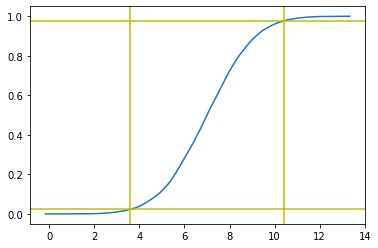

In [20]:
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

ecdf = ECDF(observations)

plt.plot(ecdf.x, ecdf.y)

plt.axhline(y = 0.025, color = 'y', linestyle='-')
plt.axvline(x = np.mean(observations) - (2 * np.std(observations)), color = 'y', linestyle='-')

plt.axhline(y = 0.975, color = 'y', linestyle='-')
plt.axvline(x = np.mean(observations) + (2 * np.std(observations)), color = 'y', linestyle='-')